In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import acquire
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire.get_titanic_data()
# prepare the data
train, validate, test = acquire.prep_titanic_data(df)

# drop object columns and create X_train of features only 
# and y_train of survived only. 
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

# check the shape
X_train.shape, X_validate.shape, X_test.shape


((498, 9), (214, 9), (179, 9))

# Baseline

In [3]:
def establish_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_prediction = y_train.mode()

    # create a series of predictions with that value, 
    # the same length as our training set
    y_train_pred = pd.Series([0]*len(y_train))

    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy


In [4]:
baseline_accuracy = establish_baseline(y_train)

## 1. Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [5]:
logit1 = LogisticRegression(C=1, 
                           random_state=1349, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# fit model with age, pclass and fare as only features
logit1.fit(X_train[['age', 'pclass', 'fare']], y_train)

# compute accuracy
train_accuracy = logit1.score(X_train[['age', 'pclass', 'fare']], 
                             y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')


Train Accuracy: 0.6947791164658634
Baseline Accuracy: 0.6164658634538153


Model does better than the baseline only with age, pclass and fare

## 2.Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.



In [6]:
logit2 = LogisticRegression(C=1,
                           random_state=1349, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# fit model with age, pclass, fare and sex_male as only features
logit2.fit(X_train[['age', 'pclass', 'fare', 'sex_male']], 
          y_train)

# compute accuracy
train_accuracy = logit2.score(X_train[['age', 'pclass', 'fare', 'sex_male']], 
                             y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.7971887550200804
Baseline Accuracy: 0.6164658634538153


including sex, it does better than baseline.

## 3. Try out other combinations of features and models.

In [7]:
logit3 = LogisticRegression(C=1, 
                           random_state=1349, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# fit model with all features
logit3.fit(X_train, y_train)

# compute accuracy
train_accuracy = logit3.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')


Train Accuracy: 0.8072289156626506
Baseline Accuracy: 0.6164658634538153


In [8]:
logit4 = LogisticRegression(C=1, 
                           random_state=1349, 
                           intercept_scaling=1, 
                           solver='lbfgs'
                          )

# fit model with all features
logit4.fit(X_train, y_train)

# compute accuracy
train_acc4 = logit4.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_acc4}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8172690763052208
Baseline Accuracy: 0.6164658634538153


In [9]:
logit5 = LogisticRegression(C=1,
                            class_weight='balanced',
                            random_state=1349, 
                            intercept_scaling=1, 
                            solver='lbfgs'
                           )

# fit model with all features
logit5.fit(X_train, y_train)

# compute accuracy
train_acc5 = logit5.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_acc5}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8092369477911646
Baseline Accuracy: 0.6164658634538153


In [10]:
logit6 = LogisticRegression(C=0.1,
                            random_state=1349, 
                            intercept_scaling=1, 
                            solver='lbfgs'
                           )

# fit model with all features
logit6.fit(X_train, y_train)

# compute accuracy
train_acc6 = logit6.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_acc6}')
print(f'Baseline Accuracy: {baseline_accuracy}')


Train Accuracy: 0.8273092369477911
Baseline Accuracy: 0.6164658634538153


My 3 best models are currently: logit4, logit5, logit6

## 4. Use you best 3 models to predict and evaluate on your validate sample. 4. 

In [11]:
# use logit4 to make predictions for the X_validate observations
y_val_pred4 = logit4.predict(X_validate)
# compute accuracy
val_acc4 = logit4.score(X_validate, y_validate)

model4 = [4, train_acc4, val_acc4]


y_val_pred5 = logit5.predict(X_validate)
# compute accuracy
val_acc5 = logit5.score(X_validate, y_validate)

model5 = [5, train_acc5, val_acc5]


y_val_pred6 = logit6.predict(X_validate)
# compute accuracy
val_acc6 = logit6.score(X_validate, y_validate)

model6 = [6, train_acc6, val_acc6]

pd.DataFrame([model4, model5, model6], columns=['model', 'in-sample accuracy','out-of-sample accuracy'])
            

,model,in-sample accuracy,out-of-sample accuracy
0,4,0.817269,0.789720
1,5,0.809237,0.775701
2,6,0.827309,0.789720


## 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [12]:
y_test_pred = logit6.predict(X_test)
# compute accuracy
test_acc = logit6.score(X_test, y_test)

test_acc

0.8044692737430168

In [13]:
print('Coefficient: \n', logit6.coef_)
print('Intercept: \n', logit6.intercept_)

Coefficient: 
 [[-8.13998835e-01 -2.69540899e-02 -3.35823600e-01 -1.51148031e-02
   1.08559796e-03 -3.63926644e-01 -1.78016027e+00  3.18893204e-01
  -1.28228221e-01]]
Intercept: 
 [3.67461745]


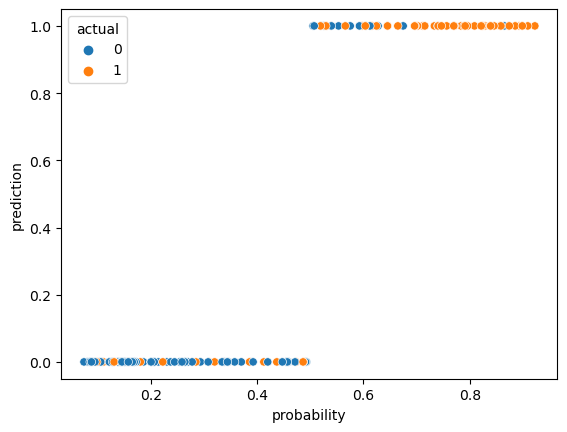

In [14]:
y_pred_proba = logit6.predict_proba(X_test)
# select the 2nd item in the array to get prob of survival (1)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

test_results = pd.DataFrame({'probability': y_pred_proba, 
                             'prediction': y_test_pred,
                             'actual': y_test})

sns.scatterplot(x='probability', y='prediction', 
                data=test_results, 
                hue='actual'
               )
plt.show()

Accuracy is a little higher on test than on validate, and it is lower on test than train.